In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.dpi"]=300

creiamo un dataset a 3 classi generato con make_blobs.

In [2]:
X, y =make_blobs(
    n_samples=11,
    centers=[
        (0,0),
        (2,2),
        (-2,2)
    ],
    random_state=0,
    cluster_std=0.4
)
print(X.shape)
print(y.shape)
print(X[:10])   #vediamo le classi di appartenenza
print(y[:10])

(11, 2)
(11,)
[[-3.02119593  2.26144744]
 [ 2.30441509  2.04867001]
 [ 0.39149519  0.89635728]
 [-1.40236837  1.91793669]
 [ 2.05761743  2.5817094 ]
 [ 0.70562094  0.16006288]
 [-1.87477292  1.6583617 ]
 [ 1.95871246  2.1642394 ]
 [ 2.17754529  2.13346973]
 [ 0.7470232  -0.39091115]]
[2 1 0 2 1 0 2 1 1 0]


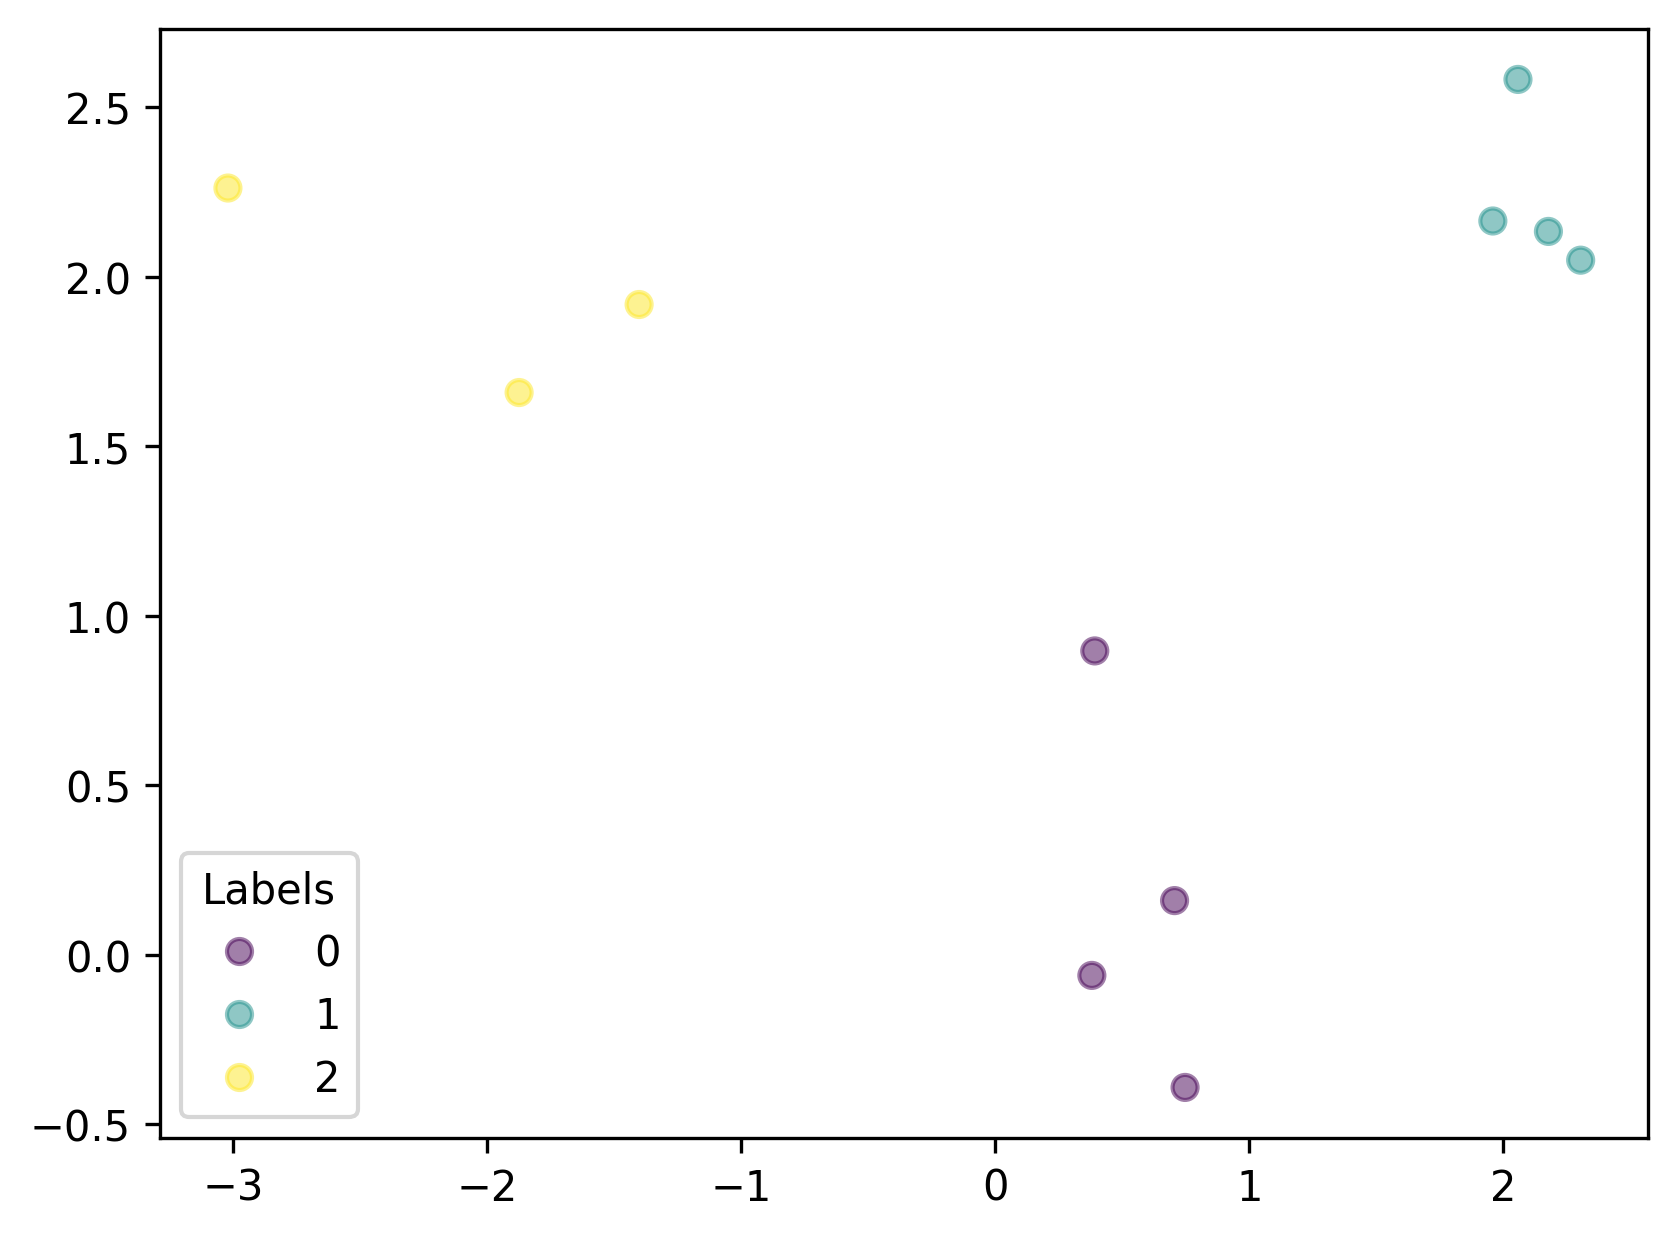

In [3]:
unique = list(np.unique(y))
scatter=plt.scatter(
    X[:,0], #tutti gli elementi della stessa classe avranno lo stesso colore
    X[:,1],
    c=y, #il colore si basa sulle etichette
    alpha=0.5
)
l=scatter.legend_elements(num=unique)[0]
plt.legend(handles=l, labels=unique, title="Labels")
plt.show()

In [4]:
priors=np.bincount(y)/len(y)
# Count number of occurrences of each value in array of non-negative ints

print(priors)

[0.36363636 0.36363636 0.27272727]


In [6]:
def mean_from_scratch(X,y):
    l=[]
    for i, label in enumerate(unique):
        column=  X[np.where(y==i)]#valore in X delle colonne in cui abbiamo la clsse y di X
        l.append(column.mean(axis=0))
    return(np.array(l))

means=np.array([X[np.where(y==i)].mean(axis=0) for i in unique]) #rappresentazione piu compatta
stds=np.array([X[np.where(y==i)].std(axis=0)for i in unique])

print(means)
print(np.equal(means, mean_from_scratch(X,y))) #i valori di due matrici sono uguali tra loro?
    #le due mastrici sono uguali 

print(means.shape)
print(stds.shape)

[[ 0.55604367  0.15124153]
 [ 2.12457257  2.23202214]
 [-2.09944574  1.94591528]]
[[ True  True]
 [ True  True]
 [ True  True]]
(3, 2)
(3, 2)


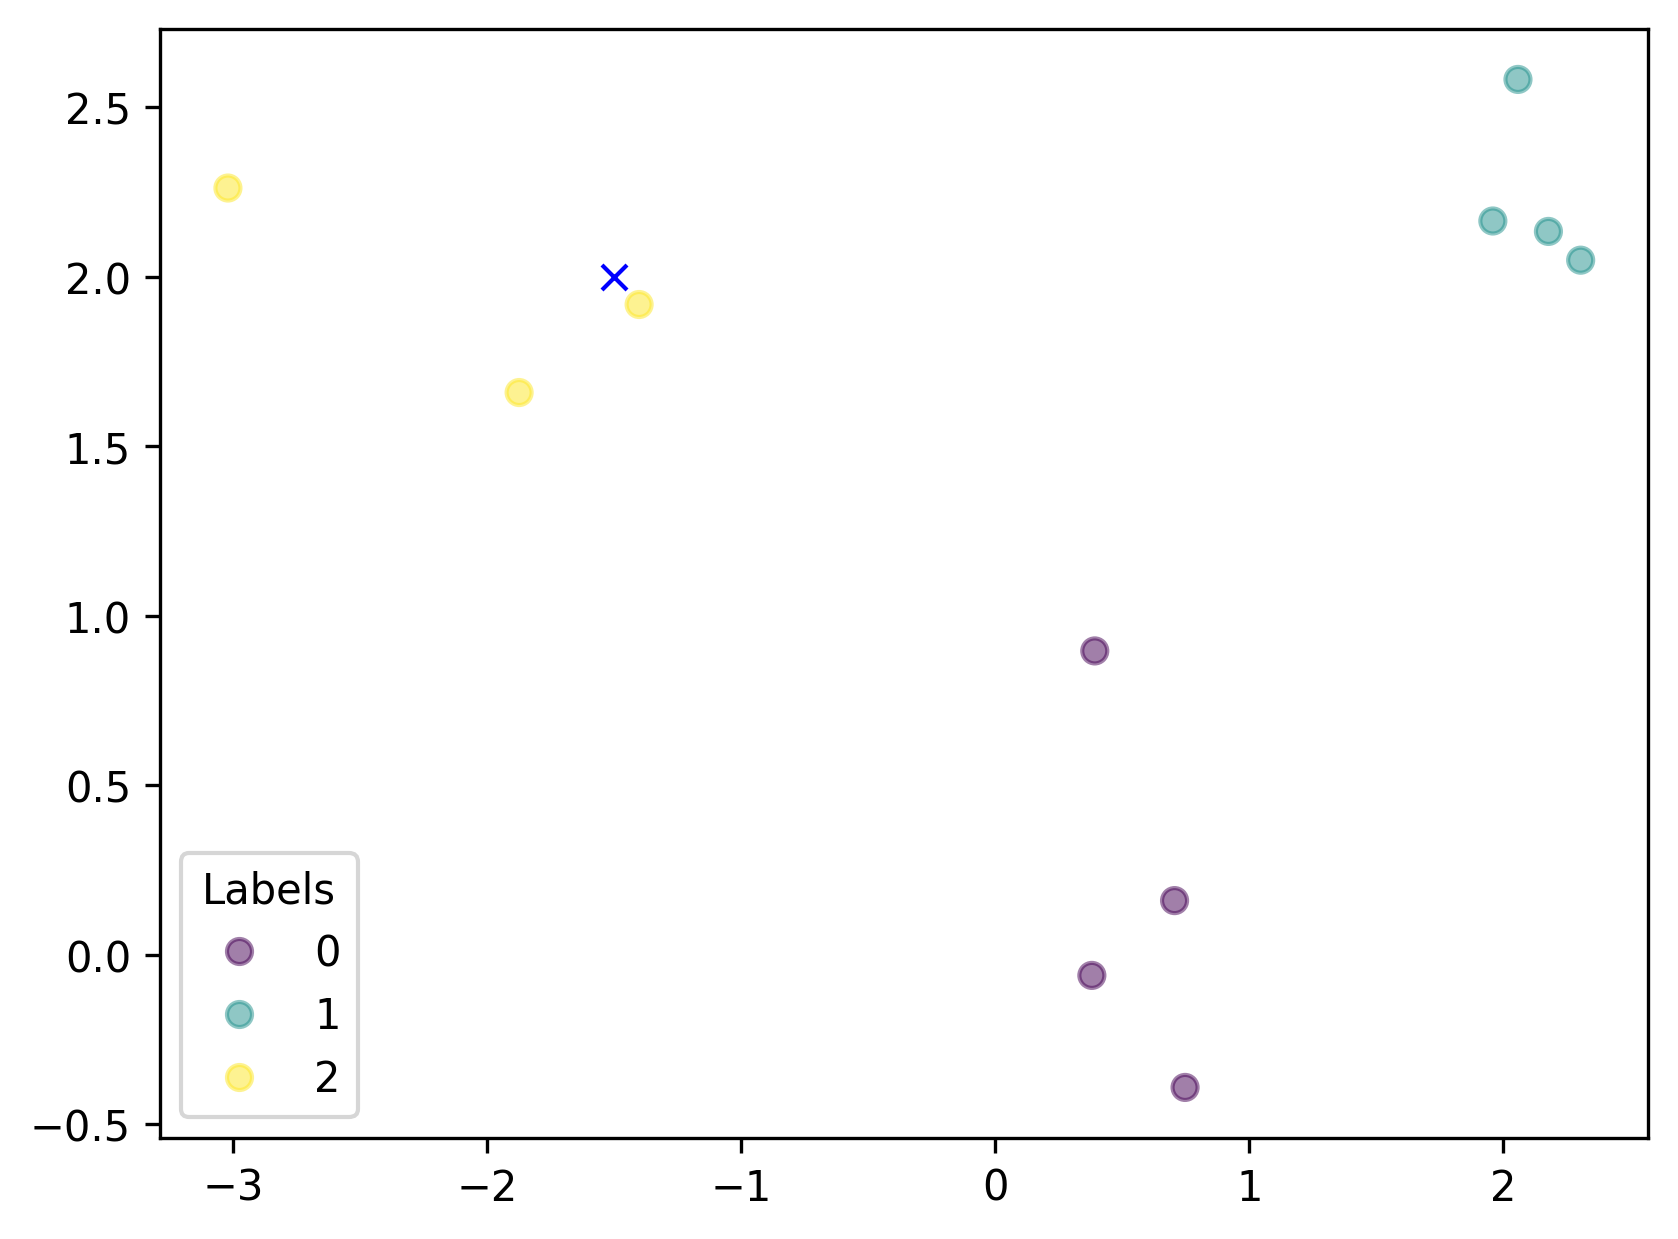

In [7]:
#creaimo un punto
x_u=np.array([-1.5,2])

scatter =plt.scatter(
    X[:,0],
    X[:,1],
    c=y,
    alpha=0.5
)
l=scatter.legend_elements(num=unique)[0]
plt.legend(handles=l, title="Labels", labels=unique)
plt.plot(x_u[0],x_u[1], "bx")
plt.show()

In [8]:
#creao la formula della gaussiana
def gaussian (x, mean, std_dev):
    return 1/np.sqrt(
        2*np.pi*std_dev**2
    )*np.exp(-0.5*((x-mean)/std_dev)**2)

probabilities =[]
print(x_u)
for i in unique: #per ciascuna classe
    prob=1
    for j in range(X.shape[1]): #dimensione del dataset #per ciascuna feature
        prob*=gaussian(x_u[j], means[i][j], stds[i][j]) #valore medio per feature e per classe

    probabilities.append(prob.prod()*priors[i])
print(probabilities)

for i, p in enumerate(probabilities):
    print(f"Class {i} -> {p:12f}")

[-1.5  2. ]
[1.333853269850755e-35, 1.2763884920413255e-170, 0.17108884746152908]
Class 0 ->     0.000000
Class 1 ->     0.000000
Class 2 ->     0.171089


In [10]:
for i, p in enumerate(probabilities):
    probabilities[i]=p/np.sum(probabilities)

for i, p in enumerate(probabilities):
    print(f"Class {i} -> {p:12f}")

#ora otteniamo delle probabilità

Class 0 ->     0.000000
Class 1 ->     0.000000
Class 2 ->     1.000000


In [11]:
print(f"Classe di uscita di {x_u}:{np.argmax(probabilities)}")

Classe di uscita di [-1.5  2. ]:2
